In [1]:
!pip install category_encoders
!pip install polars
!pip install imbalanced-learn
!pip install dask
!pip install dask-ml
!pip install lightgbm
!pip install catboost
!pip install ydata_profiling
!pip install dtale
!pip install feature-engine
!pip install dython
!pip install yellowbrick

INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 38.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.3 requires num

In [2]:
!pip install --upgrade scikit-learn


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
import polars as pl
import re
from time import time
from category_encoders import TargetEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.quantile_encoder import QuantileEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.preprocessing import FunctionTransformer , SplineTransformer , StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from feature_engine.creation import MathFeatures , DecisionTreeFeatures
from feature_engine.encoding import RareLabelEncoder
from sklearn.impute import SimpleImputer
from category_encoders import JamesSteinEncoder , TargetEncoder , CatBoostEncoder , WOEEncoder , MEstimateEncoder , HelmertEncoder , LeaveOneOutEncoder , BinaryEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler , PowerTransformer , QuantileTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from yellowbrick.features import Manifold , radviz
from yellowbrick.datasets import load_occupancy
from sklearn.feature_selection import SelectPercentile,f_classif , SelectFdr , SelectFpr
from sklearn.metrics import roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
pd.set_option('future.no_silent_downcasting', True)

In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

# EDA

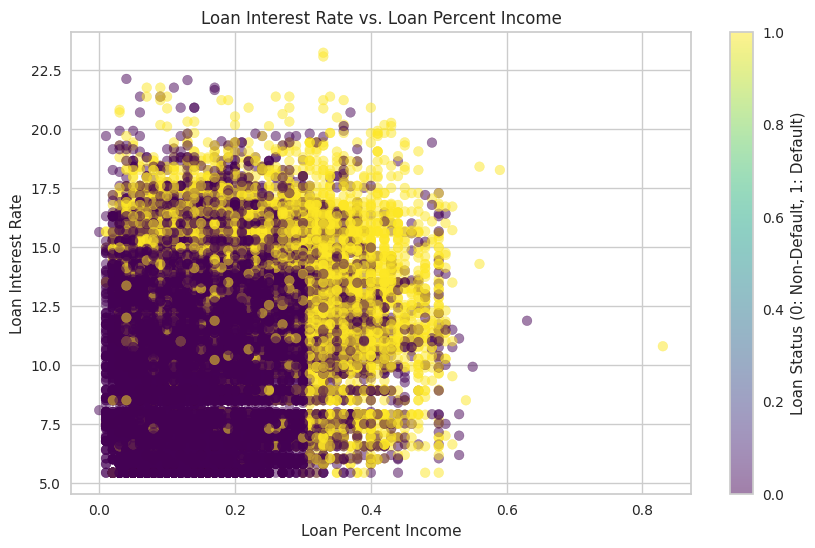

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['loan_percent_income'], df['loan_int_rate'], c=df['loan_status'], cmap='viridis' , alpha=0.5)
plt.xlabel('Loan Percent Income')
plt.ylabel('Loan Interest Rate')
plt.title('Loan Interest Rate vs. Loan Percent Income')
_ = plt.colorbar(label='Loan Status (0: Non-Default, 1: Default)')
#we can see the density of defaulters and non defaulters. Low interest rate or low percent income or 
#both low interest rate and low percent income tends to be non defaulters.

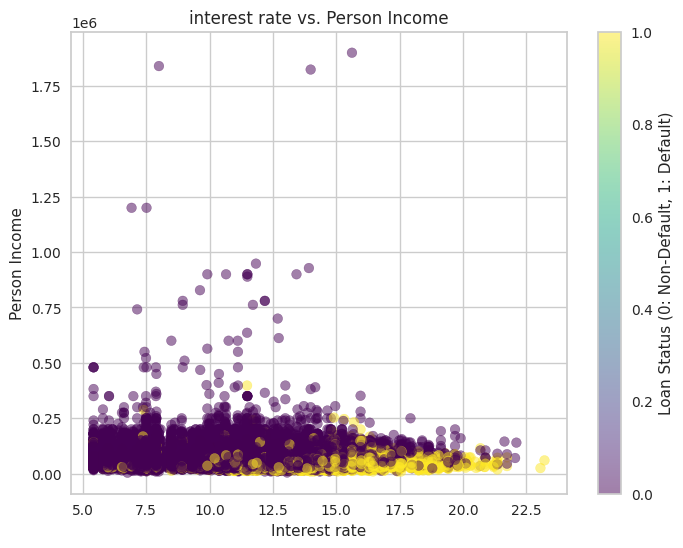

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter( df['loan_int_rate'],df['person_income'], c=df['loan_status'], cmap='viridis' , alpha=0.5)
plt.title('interest rate vs. Person Income')
plt.xlabel('Interest rate')
plt.ylabel('Person Income')
_ = plt.colorbar(label='Loan Status (0: Non-Default, 1: Default)')
#As the interest rate increases more people tend to default on loan payment.

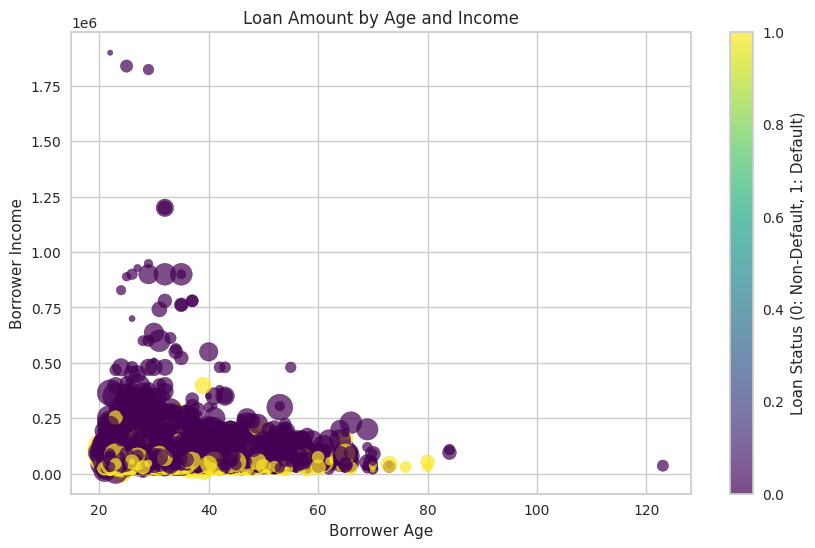

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['person_age'], df['person_income'] , s=df['loan_amnt'] /100, c=df['loan_status'], cmap='viridis', alpha=0.7)
plt.xlabel('Borrower Age')
plt.ylabel('Borrower Income')
plt.title('Loan Amount by Age and Income')
_ = plt.colorbar(label='Loan Status (0: Non-Default, 1: Default)')
#, s=df['loan_amnt'] /100

<Axes: xlabel='loan_status', ylabel='person_income'>

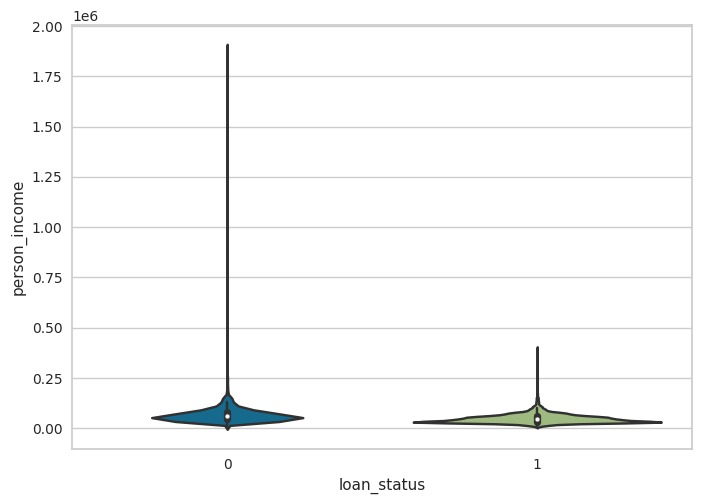

In [8]:
sns.violinplot(data=df,y='person_income'  ,x='loan_status')

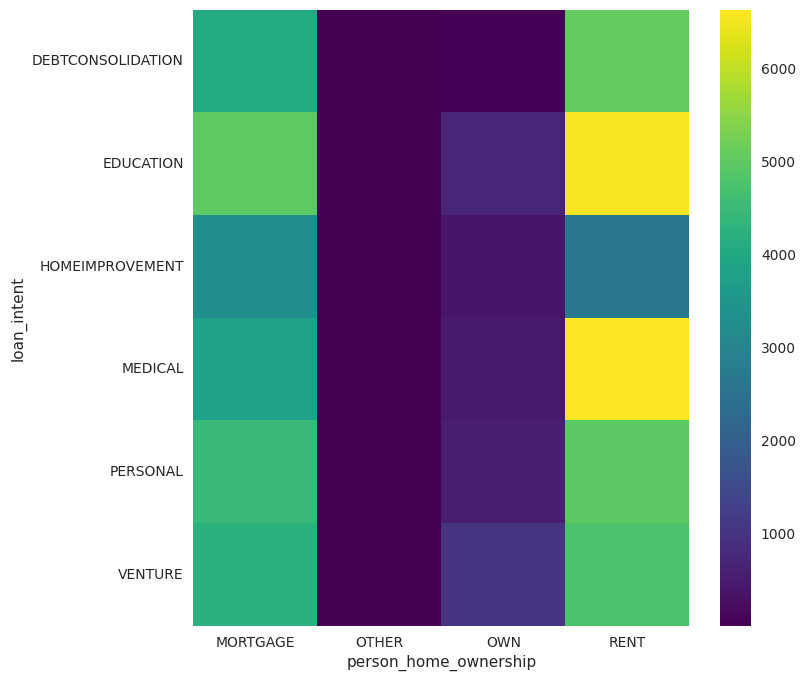

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['loan_intent'].value_counts()
    for x_label, grp in df.groupby('person_home_ownership')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('person_home_ownership')
_ = plt.ylabel('loan_intent')

In [10]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)


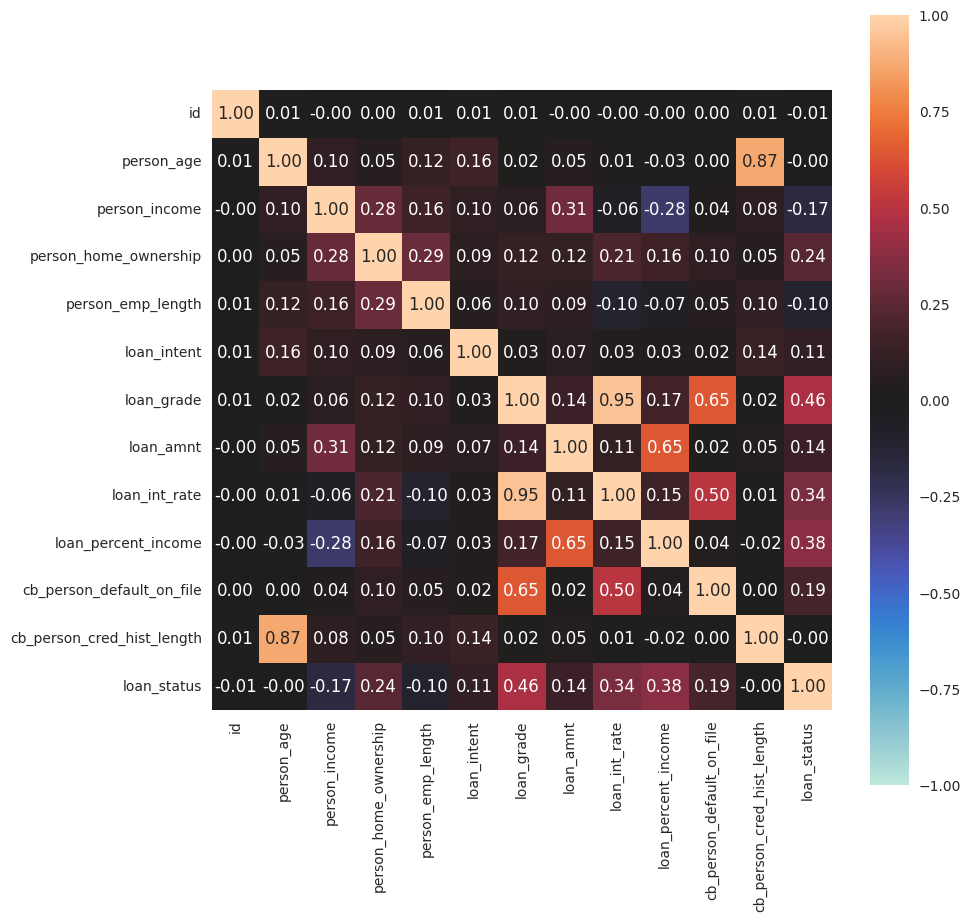

In [11]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
styled_df = df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None)
styled_df.format(precision=2)

# Display the styled DataFrame
styled_df

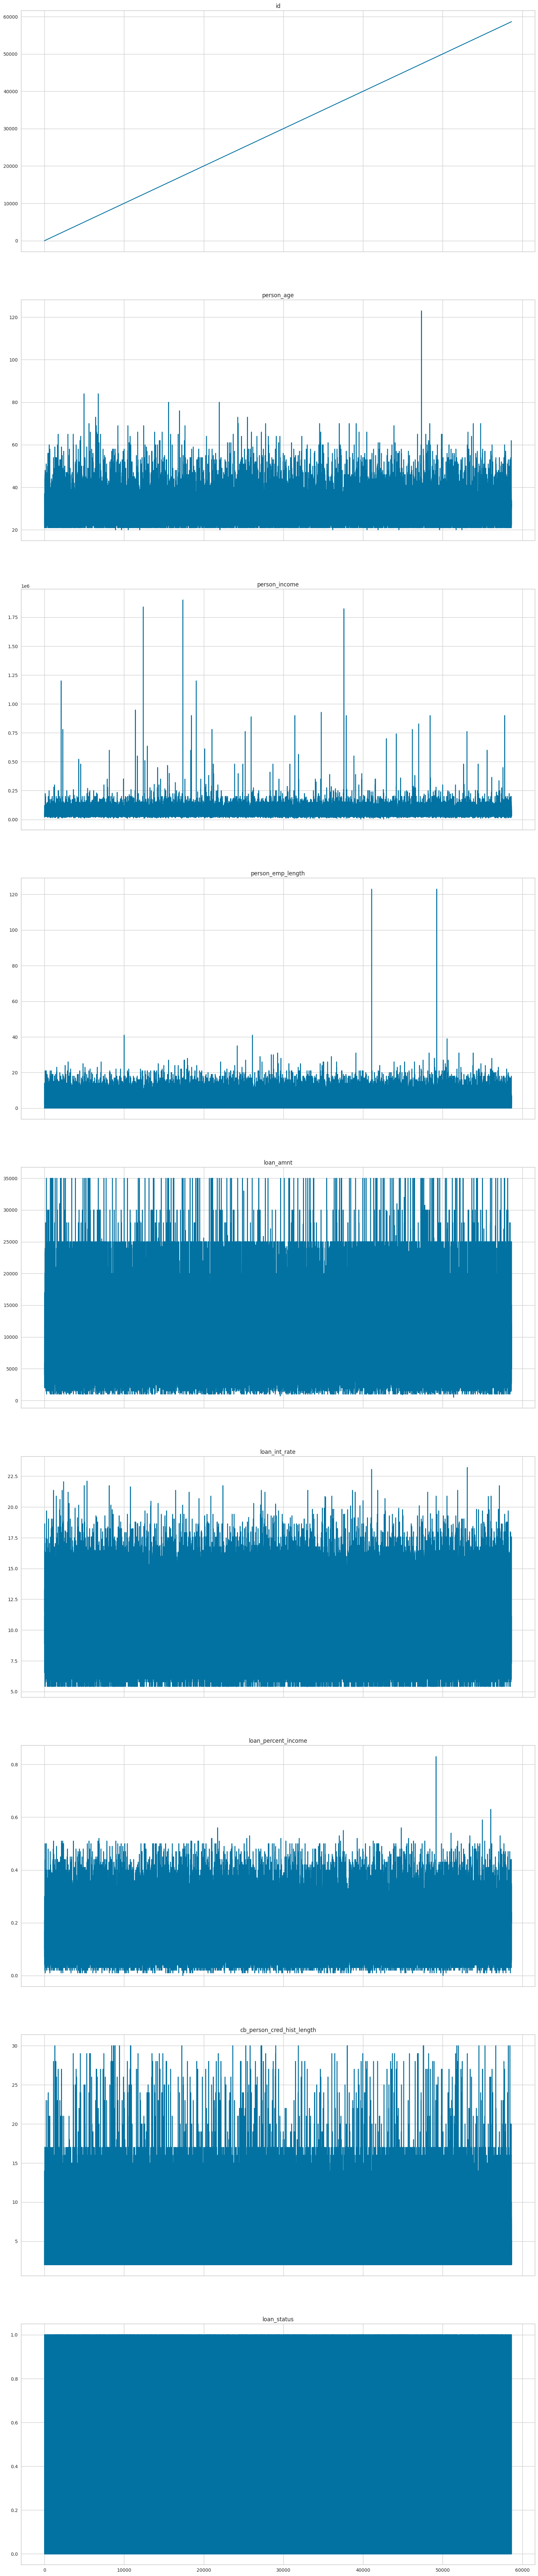

In [12]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')
columns = list(num.columns)
fig, ax = plt.subplots(nrows=len(columns), ncols=1, sharex=True, figsize=(20,100))
for i in range(len(columns)):
    ax[i].plot(num[columns[i]])
    ax[i].set_title(columns[i])

<Axes: ylabel='count'>

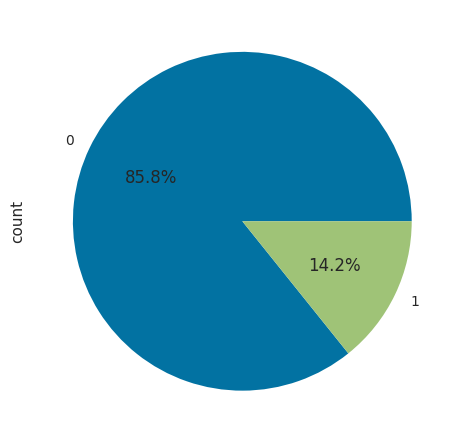

In [13]:
df['loan_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
#imbalanced dataset

# Feature Engineering

In [14]:
def transform(df):
  ptyj = PowerTransformer(method = 'yeo-johnson')
  df['person_age_yj'] = ptyj.fit_transform(df['person_age'].values.reshape(-1,1))
  df['person_income_log'] = np.log(df['person_income'])
  pytj_loan_int_rate = PowerTransformer(method = 'box-cox')
  df['loan_int_rate_bc']  = pytj_loan_int_rate.fit_transform(df['loan_int_rate'].values.reshape(-1,1))
  df['loan_percent_income_sqrt'] = np.sqrt(df['loan_percent_income'])
  df['loan_amnt_sqrt'] = np.sqrt(df['loan_amnt'])
  return df
#all the transformations on the variables are based on their histogram

def trim(df):
  df['person_emp_length'] = df['person_emp_length'].apply(lambda x: 20 if x > 20 else x)
  df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].apply(lambda x: 17.5 if x > 17.5 else x)
  return df
#winsorize or clip to remove the higher outliers, here I am clipping.

In [15]:
df = transform(df)
df_test = transform(df_test)

df = trim(df)
df_test = trim(df_test)


In [16]:
df1 = df[['person_home_ownership','person_emp_length', 'loan_intent', 'loan_grade', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'person_age_yj',
       'person_income_log', 'loan_int_rate_bc', 'loan_percent_income_sqrt',
       'loan_amnt_sqrt']]

df_test1 = df_test[['person_home_ownership','person_emp_length', 'loan_intent', 'loan_grade', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_age_yj',
       'person_income_log', 'loan_int_rate_bc', 'loan_percent_income_sqrt',
       'loan_amnt_sqrt']]

In [17]:
cat= df1.select_dtypes(include='object')
num = df1.select_dtypes(exclude='object').drop('loan_status',axis=1)

cat_test = df_test1.select_dtypes(include='object')
num_test = df_test1.select_dtypes(exclude='object')

In [18]:
jt = TargetEncoder()
df_cat_encode = jt.fit_transform(cat,df1['loan_status'] , handle_unknown = 0.05 , handle_missing = -1)
ss = StandardScaler()
num_encode = ss.fit_transform(num)
df_num_encode = pd.DataFrame(num_encode,columns=num.columns)
df_encode = pd.concat([df_num_encode,df_cat_encode],axis=1)
#df_ss = ss.fit_transform(df_encode)
#df_1 = pd.DataFrame(df_ss,columns=df_encode.columns)
df_1 = df_encode

In [19]:
from feature_engine.creation import DecisionTreeFeatures


dt_y = df1['loan_status']
dt_x = df_1.reset_index(drop=True)

dt = DecisionTreeFeatures(
    variables=['person_emp_length', 'cb_person_cred_hist_length',
               'person_age_yj', 'person_income_log', 'loan_int_rate_bc',
               'loan_percent_income_sqrt', 'loan_amnt_sqrt', 'person_home_ownership',
               'loan_intent', 'loan_grade', 'cb_person_default_on_file'],
    cv=3,
    scoring='roc_auc',
    random_state=42,
    regression=False
)

df_dt = dt.fit(dt_x, dt_y)

# Transform the data
new_dt_x = dt.transform(dt_x)



/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/p

In [51]:
len(new_dt_x.columns)

2058

# Feature interactions and class separations

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_1, df1['loan_status'],test_size=0.2,random_state=42)

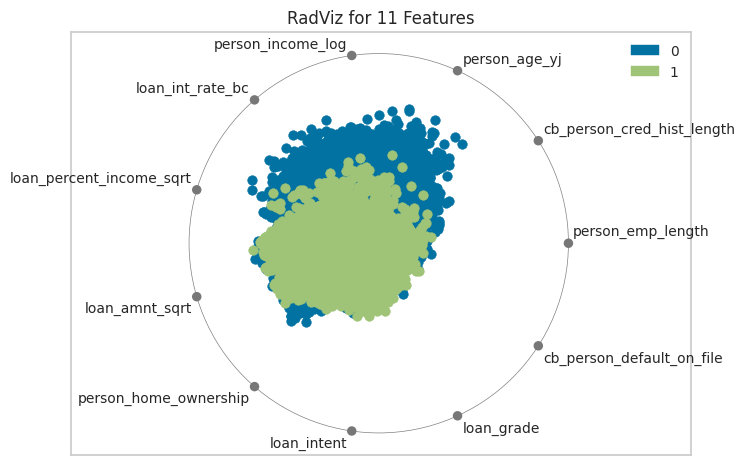

<Axes: title={'center': 'RadViz for 11 Features'}>

In [21]:
unique_y = np.unique(y_train)
mapping = {val: i for i, val in enumerate(unique_y)}

# Map the original values in y_train to the new sequential values
y_train_mapped = np.vectorize(mapping.get)(y_train)

# Instantiate the visualizer
visualizer = radviz(x_train, y_train_mapped, classes=unique_y.astype(str).tolist())

visualizer.fit(x_train, y_train_mapped) 
visualizer.transform(x_train) 
visualizer.show()  
#The separation of the blue and green clusters suggests that the two classes are distinct in terms of their feature values.
#Features that pull data points towards their positions are likely more influential in determining the class.

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity = 25)
X_embedded = tsne.fit_transform(x_train)

Text(0.5, 1.0, 'Standard t-SNE')

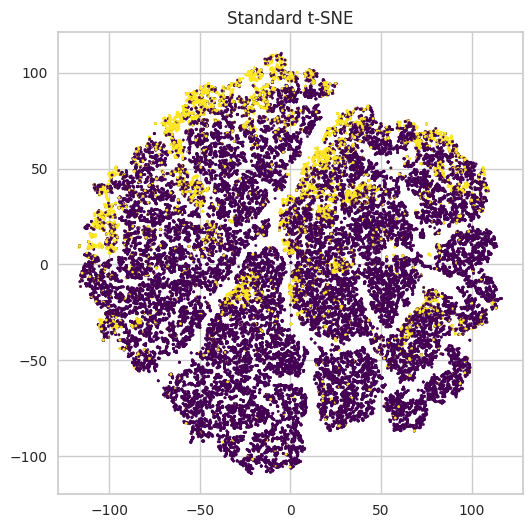

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_train, s=3,cmap='viridis')
plt.title("Standard t-SNE")

# Time to fit the model

In [46]:
x_train,x_test,y_train,y_test=train_test_split(new_dt_x,dt_y,random_state=42,test_size = 0.2)

In [25]:
#since thisis a case of imbalanced dataset, we will use 4 different methods to see which works the best
# 1) oversampling
from imblearn.over_sampling import RandomOverSampler
rom = RandomOverSampler(sampling_strategy={0:46916,1:46916})
X_over,y_over = rom.fit_resample(x_train,y_train)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , classification_report
lr = LogisticRegression()
lr_over = lr.fit(X_over,y_over)
y_pred = lr_over.predict(x_test)
print(roc_auc_score(y_test,lr_over.predict_proba(x_test)[:,1] ))
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9402863781809584
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10087
           1       0.69      0.81      0.74      1642

    accuracy                           0.92     11729
   macro avg       0.83      0.87      0.85     11729
weighted avg       0.93      0.92      0.92     11729



In [27]:
#2) undersampling
from imblearn.under_sampling import RandomUnderSampler
rom = RandomUnderSampler(sampling_strategy={0:6708,1:6708})
X_under,y_under = rom.fit_resample(x_train,y_train)

In [28]:
lr = LogisticRegression()
lr_under = lr.fit(X_under,y_under)
y_pred = lr_under.predict(x_test)
print(roc_auc_score(y_test,lr_under.predict_proba(x_test)[:,1] ))
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9400821259427874
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10087
           1       0.67      0.81      0.74      1642

    accuracy                           0.92     11729
   macro avg       0.82      0.87      0.84     11729
weighted avg       0.93      0.92      0.92     11729



In [29]:
#3) SMOTE
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(sampling_strategy={0:46916,1:46916})
X_over,y_over = rom.fit_resample(x_train,y_train)

In [30]:
lr = LogisticRegression()
lr_over = lr.fit(X_over,y_over)
y_pred = lr_over.predict(x_test)
print(roc_auc_score(y_test,lr_over.predict_proba(x_test)[:,1] ))
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9397022397226951
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10087
           1       0.68      0.82      0.74      1642

    accuracy                           0.92     11729
   macro avg       0.83      0.88      0.85     11729
weighted avg       0.93      0.92      0.92     11729



In [31]:
from imblearn.under_sampling import AllKNN
all = AllKNN(sampling_strategy={0:6708,1:6708})
X_under,y_under = rom.fit_resample(x_train,y_train)

In [32]:
lr = LogisticRegression()
lr_under = lr.fit(X_under,y_under)
y_pred = lr_under.predict(x_test)
print(roc_auc_score(y_test,lr_under.predict_proba(x_test)[:,1] ))
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9402907252578572
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10087
           1       0.68      0.82      0.74      1642

    accuracy                           0.92     11729
   macro avg       0.82      0.88      0.85     11729
weighted avg       0.93      0.92      0.92     11729



In [33]:
#Cost-Sensitive Learning
lr = LogisticRegression(class_weight= {0:5 , 1:25})
lr_under = lr.fit(x_train,y_train)
y_pred = lr_under.predict(x_test)
print(roc_auc_score(y_test,lr_under.predict_proba(x_test)[:,1] ))
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9400519982848367
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10087
           1       0.72      0.80      0.76      1642

    accuracy                           0.93     11729
   macro avg       0.84      0.87      0.86     11729
weighted avg       0.93      0.93      0.93     11729



In [34]:
lr = LogisticRegression(class_weight= {0:5 , 1:25})
lr_under = lr.fit(X_under,y_under)
y_pred = lr_under.predict(x_test)
print(roc_auc_score(y_test,lr_under.predict_proba(x_test)[:,1] ))
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9383408801405845
              precision    recall  f1-score   support

           0       0.99      0.65      0.78     10087
           1       0.30      0.94      0.46      1642

    accuracy                           0.69     11729
   macro avg       0.64      0.79      0.62     11729
weighted avg       0.89      0.69      0.74     11729



# Creating pipeline

In [54]:
all_column_names = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'person_emp_length', 'cb_person_cred_hist_length', 'person_age_yj', 'person_income_log', 'loan_int_rate_bc', 'loan_percent_income_sqrt', 'loan_amnt_sqrt']


pipe1 = make_pipeline(
    FunctionTransformer(transform),FunctionTransformer(trim),ColumnTransformer([
        ('categorical', TargetEncoder(handle_unknown=0.05, handle_missing=-1), ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']),
        ('numerical', StandardScaler(), ['person_emp_length', 'cb_person_cred_hist_length', 'person_age_yj','person_income_log', 'loan_int_rate_bc', 'loan_percent_income_sqrt','loan_amnt_sqrt'])]),

    )


class ArrayToDataFrameTransformer:
    def __init__(self, column_names):
        self.column_names = column_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(X, columns=self.column_names)
    
    
    
pipe2 = make_pipeline(
    ArrayToDataFrameTransformer(column_names=all_column_names),
    DecisionTreeFeatures(variables=['person_emp_length', 'cb_person_cred_hist_length',
       'person_age_yj', 'person_income_log', 'loan_int_rate_bc',
       'loan_percent_income_sqrt', 'loan_amnt_sqrt', 'person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file'], cv=3, scoring='roc_auc', random_state=42, regression=False),
        'passthrough'
)

pipe3 =make_pipeline(SelectPercentile(f_classif ,percentile =30))
#,features_to_combine=3




In [55]:
xx = df.drop(['id','loan_status'],axis=1)
y= df['loan_status']
x_train, x_test, y_train, y_test = train_test_split(xx, y,test_size=0.2,random_state=42)
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
combined_pipeline = Pipeline([
    ('pipe1', pipe1),
    ('pipe2', pipe2) ,
    ('pipe3', pipe3) , ('LR' , LogisticRegression(class_weight= {0:5 , 1:25}))
])

# Test the combined pipeline with your data
X_combined = combined_pipeline.fit(x_train,y_train)


/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

# Predicting Pipeline 1

In [42]:
y_pred = X_combined.predict(x_test)
y_pred_prob = X_combined.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

0.9135753717324323
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     10087
           1       0.74      0.75      0.74      1642

    accuracy                           0.93     11729
   macro avg       0.85      0.85      0.85     11729
weighted avg       0.93      0.93      0.93     11729



# Fitting pipeline 2

In [56]:
combined_pipeline = Pipeline([
    ('pipe1', pipe1),
    ('pipe2', pipe2)  , ('LR' , LogisticRegression(class_weight= {0:5 , 1:25}))
])

# Test the combined pipeline with your data
X_combined = combined_pipeline.fit(x_train,y_train)
#without feature selection

/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

# Predicting pipeline 2

In [57]:
y_pred = X_combined.predict(x_test)
y_pred_prob = X_combined.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/opt/conda/lib/python3.10/site-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

0.9386873180189841
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10087
           1       0.71      0.80      0.75      1642

    accuracy                           0.93     11729
   macro avg       0.84      0.87      0.85     11729
weighted avg       0.93      0.93      0.93     11729



# Feature scoring curve

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

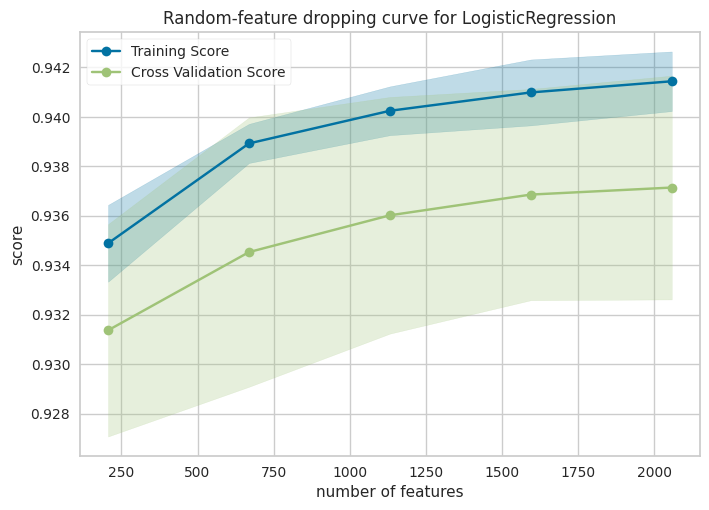

<Axes: title={'center': 'Random-feature dropping curve for LogisticRegression'}, xlabel='number of features', ylabel='score'>

In [48]:
from yellowbrick.model_selection import DroppingCurve

# Initialize visualizer with estimator
visualizer = DroppingCurve(LogisticRegression(class_weight= {0:5 , 1:25}),scoring = 'roc_auc')

# Fit the data to the visualizer
visualizer.fit(x_train,y_train)
# Finalize and render the figure
visualizer.show()

# Prediction error bar

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


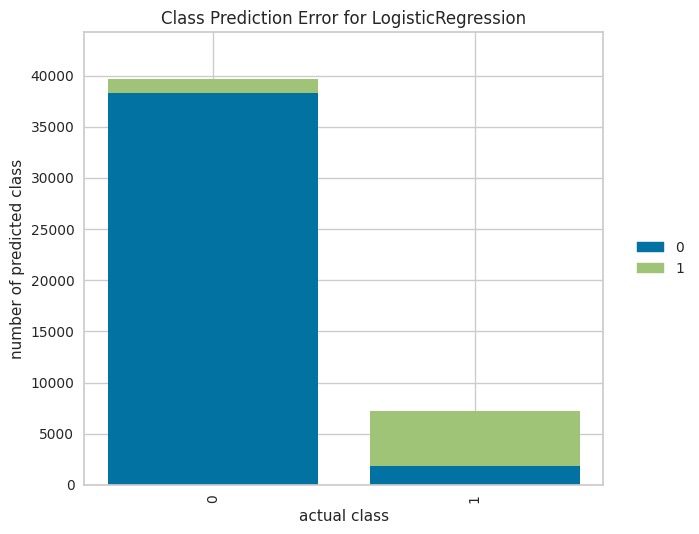

In [49]:
from yellowbrick.classifier import class_prediction_error

visualizer = class_prediction_error(
    LogisticRegression(class_weight= {0:5 , 1:25}), x_train,y_train
)

In [50]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(x_train,y_train)
y_pred = brf.predict(x_test)
print(roc_auc_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


0.8709690069114899
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     10087
           1       0.60      0.83      0.70      1642

    accuracy                           0.90     11729
   macro avg       0.78      0.87      0.82     11729
weighted avg       0.92      0.90      0.90     11729

